# MNM Diagnostics - task solution

### Import libraries

In [1]:
import os, json, pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from plotly.offline import plot
from scipy.stats import probplot
from scipy.stats import shapiro
from sklearn.decomposition import PCA

import xgboost as xgb
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import shap
import warnings
warnings.filterwarnings('ignore')

pwd = os.getcwd()

C:\Users\klebiecka\.conda\envs\dash_environment\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\klebiecka\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



### Define functions and variables

### Load data

In [2]:
### Read data from .csv file
data = pd.read_csv(pwd + "/dataset.txt", sep=",", index_col=[0])

### Saving subset of dataset
data_head_30 = data.head(30).reset_index()
data_head_30.to_csv(pwd + "/data_head_30.csv",index=False)
#data_head_30 = pd.read_csv(pwd + "/data_head_30.csv", sep=",")

data.head(5)

X0  X1   X2        X3        X4        X5        X6  X7  X8   X9  ...  \
0  65  22  216  0.749175  0.000000  0.625455  0.092437   2  10  204  ...   
1  49  19  399  0.533191  0.044968  0.530667  0.045455   2  30  367  ...   
2  59  34  154  0.785425  0.044534  0.669903  0.180851   0  14  140  ...   
3  56  73   19  1.000000  0.000000  0.437500  0.793478   0   1   18  ...   
4  69  48  172  0.844291  0.010381  0.509579  0.218182   1  14  157  ...   

   X144  X145  X146  X147  X148  X149  X150  X151  X152  Class  
0     4     4     9     4     4     2     2     3     2    1.0  
1     8     2     7     8     2     3     4     1     4    1.0  
2     3     4     3     3     9     4     2     2     4    0.0  
3     2     2     2     2     2     2     1     1     1    1.0  
4     2     3     3     3     2     2     2     2     6    1.0  

[5 rows x 154 columns]

### Data preprocessing

In [3]:
### Check type of columns and shape of dataset
print("Type of columns:")
print(data.columns.to_series().groupby(data.dtypes).groups)

print('\nShape of dataset:')
print(data.shape)

Type of columns:
{int64: ['X0', 'X1', 'X2', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X23', 'X38', 'X39', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X111', 'X112', 'X113', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X149', 'X150', 'X151', 'X152'], float64: ['X3', 'X4', 'X5', 'X6', 'X19', 'X20', 'X21', 'X22', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X40', 'X41', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65'

In [4]:
### Check duplicates 
data = data.drop_duplicates()
print(data.shape)

(253, 154)


In [5]:
### Check how many empty values we have 
print("Empty values in every single column:")
print(data.isna().sum().tolist())

Empty values in every single column:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34]


In [6]:
### Assign unlabeled data to seperate dataframe
unlabeled_data = data[data.isna().any(axis=1)]
unlabeled_data.shape

(34, 154)

In [7]:
### Unlabeled data - descriptive statistics
unlabeled_data.describe()

X0          X1          X2         X3         X4         X5  \
count   34.000000   34.000000   34.000000  34.000000  34.000000  34.000000   
mean    94.088235   40.264706  230.764706   0.798356   0.030619   0.558908   
std     53.420781   32.008814  160.126666   0.160144   0.049160   0.075308   
min     17.000000    3.000000   11.000000   0.346983   0.000000   0.469453   
25%     53.000000   13.750000   96.250000   0.727825   0.000000   0.514906   
50%     75.000000   32.000000  237.000000   0.812876   0.007190   0.537302   
75%    132.500000   65.750000  315.000000   0.940331   0.020809   0.578221   
max    215.000000  112.000000  728.000000   1.000000   0.162844   0.867470   

              X6         X7         X8          X9  ...      X144       X145  \
count  34.000000  34.000000  34.000000   34.000000  ...  34.00000  34.000000   
mean    0.187380   0.617647  13.970588  216.176471  ...   2.50000   2.764706   
std     0.156452   1.044893  10.136897  152.906680  ...   0.92932   1.232362   
min     0.011312   0.000000   0.000000    8.000000  ...   1.00000   1.000000   
25%     0.062745   0.000000   6.000000   85.250000  ...   2.00000   2.000000   
50%     0.130518   0.000000  11.000000  223.000000  ...   2.00000   2.500000   
75%     0.247052   1.000000  21.500000  297.000000  ...   3.00000   3.000000   
max     0.586667   4.000000  44.000000  680.000000  ...   5.00000   7.000000   

            X146       X147       X148       X149       X150       X151  \
count  34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    3.411765   3.970588   3.529412   2.147059   2.147059   2.117647   
std     1.233808   1.714206   1.481917   0.702047   1.018982   1.121814   
min     2.000000   2.000000   2.000000   1.000000   1.000000   1.000000   
25%     2.250000   3.000000   2.250000   2.000000   2.000000   1.000000   
50%     3.000000   4.000000   3.000000   2.000000   2.000000   2.000000   
75%     4.000000   4.750000   4.000000   2.000000   2.000000   2.000000   
max     6.000000  10.000000   8.000000   5.000000   6.000000   6.000000   

            X152  Class  
count  34.000000    0.0  
mean    2.176471    NaN  
std     0.716498    NaN  
min     1.000000    NaN  
25%     2.000000    NaN  
50%     2.000000    NaN  
75%     2.000000    NaN  
max     5.000000    NaN  

[8 rows x 154 columns]

In [8]:
### Remove unlabeled data from original dataset and check shape of data 
data= data.dropna()
data.shape

(219, 154)

In [9]:
### Labeled data - descriptive statistics
data_description= pd.DataFrame(data.describe())

#Saving data_description dataframe
data_description.to_csv(pwd + "/data_description.csv")
data.describe()

X0          X1          X2          X3          X4          X5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean    81.474886   41.461187  230.538813    0.775216    0.027804    0.539884   
std     42.017177   30.077455  144.479807    0.173546    0.035483    0.076318   
min      5.000000    2.000000   17.000000    0.257679    0.000000    0.410714   
25%     52.000000   18.000000  111.500000    0.685100    0.000000    0.490948   
50%     74.000000   32.000000  231.000000    0.792531    0.012195    0.523438   
75%    106.500000   59.500000  324.500000    0.919608    0.043511    0.567925   
max    245.000000  148.000000  950.000000    1.000000    0.165842    0.898067   

               X6          X7          X8          X9  ...        X144  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.208242    0.515982   14.863014  215.159817  ...    2.931507   
std      0.190788    0.890042   11.854216  136.816951  ...    1.292130   
min      0.006689    0.000000    0.000000   14.000000  ...    1.000000   
25%      0.065792    0.000000    7.000000  101.000000  ...    2.000000   
50%      0.120582    0.000000   13.000000  213.000000  ...    3.000000   
75%      0.333345    1.000000   19.500000  308.500000  ...    4.000000   
max      0.793478    7.000000   97.000000  851.000000  ...    8.000000   

             X145        X146        X147        X148        X149        X150  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     2.885845    3.538813    3.940639    4.401826    2.283105    2.118721   
std      1.215621    1.509025    1.700281    2.253071    0.879031    1.033639   
min      1.000000    1.000000    2.000000    1.000000    1.000000    0.000000   
25%      2.000000    2.000000    3.000000    3.000000    2.000000    1.000000   
50%      3.000000    3.000000    4.000000    4.000000    2.000000    2.000000   
75%      4.000000    4.000000    5.000000    6.000000    3.000000    3.000000   
max     11.000000    9.000000   10.000000   16.000000    6.000000    8.000000   

             X151        X152       Class  
count  219.000000  219.000000  219.000000  
mean     2.228311    2.360731    0.456621  
std      1.122302    0.954233    0.499256  
min      1.000000    1.000000    0.000000  
25%      1.000000    2.000000    0.000000  
50%      2.000000    2.000000    0.000000  
75%      3.000000    3.000000    1.000000  
max      6.000000    6.000000    1.000000  

[8 rows x 154 columns]

### Split data to train and test datasets


In [10]:
### Split dataset
X = data.drop(["Class"], axis = 'columns')
y = data["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
pd.DataFrame(y_train).value_counts().tolist()

[93, 82]

In [12]:
### Check distribution of classes in train and test datasets

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=pd.DataFrame(y_train).value_counts().tolist(),
     labels=['Target value 0', 'Target value 1'],
     domain=dict(x=[0, 0.5]),
     name="Train dataset"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=pd.DataFrame(y_test).value_counts().tolist(),
     labels=['Target value 0', 'Target value 1'],
     domain=dict(x=[0.5, 1.0]),
     name="Test dataset"),
    row=1, col=2)
fig.update_layout(title='Target variable distribution accordingly for train and test datasets', title_x=0.5)
fig.show()

### Check features distribution (Gaussian distribution)

In [13]:
### Shapiro-Wilk test 
'''
Shapiro-Wilk test is a statistical test for normality. This is a quantitative method for testing the normality. 
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
'''
features_GD = []
for i in X.columns:
    if shapiro(X[i])[1]>=0.05:
        print(i,": Gaussian" , shapiro(X[i]))
        features_GD.append(i)


X34 : Gaussian ShapiroResult(statistic=0.9933816194534302, pvalue=0.4389490485191345)
X75 : Gaussian ShapiroResult(statistic=0.9875831604003906, pvalue=0.053921304643154144)
X81 : Gaussian ShapiroResult(statistic=0.98846834897995, pvalue=0.07535596191883087)


In [14]:
type(features_GD[0])

str

Feature X34


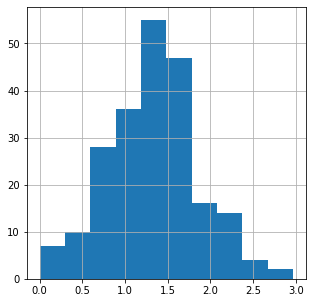

Feature X75


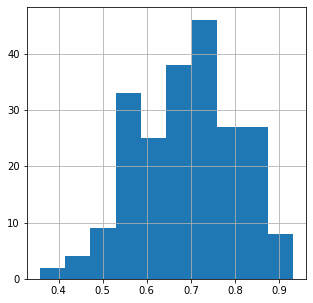

Feature X81


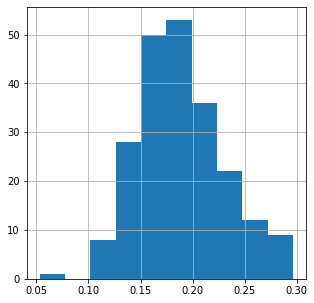

In [15]:
for i in features_GD:
    print("Feature {}".format(i))
    X[i].hist(figsize=(5,5))
    plt.show()

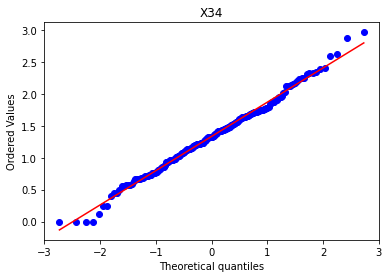

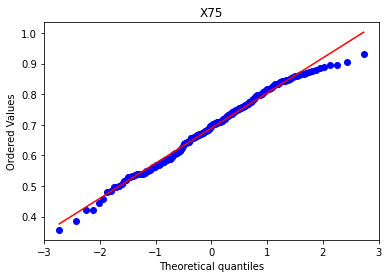

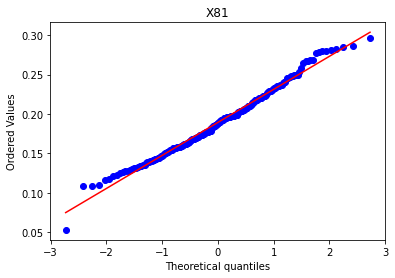

In [16]:
for i in features_GD:
    probplot(x=X[i],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

In [17]:
print(features_GD)

['X34', 'X75', 'X81']


### Summary
* **Numeric features:** 153
* **Labeled samples:** 219
* **Unlabeled samples:** 34
* **Dataset is balanced**
* **Number of features with Gaussian distribution:** 3 [X34, X75, X81]

In [18]:
### Feature correlation ###
data_to_corr = X_train
corr_matrix = data_to_corr.corr()
corr_matrix_abs = data_to_corr.corr().abs()
### Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))

### Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >0.95)]

### Drop features 
data_correlation_95 = data_to_corr
data_correlation_95.drop(to_drop, axis=1, inplace=True)
data_correlation_95.shape

(175, 132)

In [19]:
### Correlation matrix - plot ###
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr_matrix.columns,
        y = corr_matrix.index,
        z = np.array(corr_matrix)
    )
)
fig.update_layout(height = 800, width =900, title="Correlation matrix", title_x=0.5)
fig.show()

In [20]:
### PCA functions

def PCA_calculation(data, features):


    scaler = StandardScaler()
    scaler.fit(data)
    scaler_PCA = scaler.transform(data)
    pca = PCA(n_components = data.shape[1])
    pca.fit_transform(scaler_PCA)
    PCs =  ['PC' + str(i) for i in range(1,len(features) + 1)]
    values = pca.explained_variance_ratio_.tolist()
    PCs_values = dict(zip(PCs, values))

    return pca, PCs_values

def numberlist(nums,limit):   
    sum=0  
    for index,i in enumerate(nums):  
        sum += i
        if sum>=limit:  
            return nums[:index+1]
        
def PCA_feature_importance_selection(pca, features, variance_explained):

    importance = abs(pca.components_)
    values = pca.explained_variance_ratio_.tolist()
    features_array = np.zeros(len(features), dtype =np.float64)
    for i in range(len(features)):
        temp = np.zeros(len(features), dtype =np.float64)
        for j in range(len(features)):
            single_PC = importance[0]*values[j]
            temp = temp + single_PC
        features_array = features_array + temp
    idx = (-features_array).argsort()[:len(features)]

    feature_importance = []
    for i in range(len(idx)):
        feature = features[idx[i]]
        feature_importance.append(feature)
    sorted_array = np.sort(features_array)
    reverse_array = sorted_array[::-1]
    reverse_list = reverse_array.tolist()
    normalized_scores = []
    for r in range(len(reverse_list)):
        elem = (reverse_list[r]/sum(reverse_list))*100
        normalized_scores.append(elem)
    limit = sum(reverse_list)*variance_explained 
    threshold = normalized_scores[len(numberlist(reverse_list,limit))-1]

    feature_with_score_list = dict(zip(feature_importance, normalized_scores))
    feature_with_score_list = dict(sorted(feature_with_score_list.items()))

    d = dict((k, v) for k, v in feature_with_score_list.items() if v > threshold)
    selected_features = list(d.keys())

    return normalized_scores, feature_importance, selected_features, threshold



def PCA_explained_variance(pca, features):

    explained_variance_ratio = pca.explained_variance_ratio_*100
    explained_variance_ratio = explained_variance_ratio.tolist()
    variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)*100
    PCs = [ 'PC'+str(i) for i in range(1,len(features)+1)]

    return PCs, explained_variance_ratio, variance_exp_cumsum

In [21]:
### PCA analysis 
variance_explained = 0.9
features_to_PCA = data_correlation_95.columns.tolist()

pca, PCs_values = PCA_calculation(data_correlation_95, features_to_PCA)
normalized_scores, feature_importance, selected_features, threshold = PCA_feature_importance_selection(pca,  features_to_PCA, variance_explained)
PCs, explained_variance_ratio, variance_exp_cumsum = PCA_explained_variance(pca, features_to_PCA)

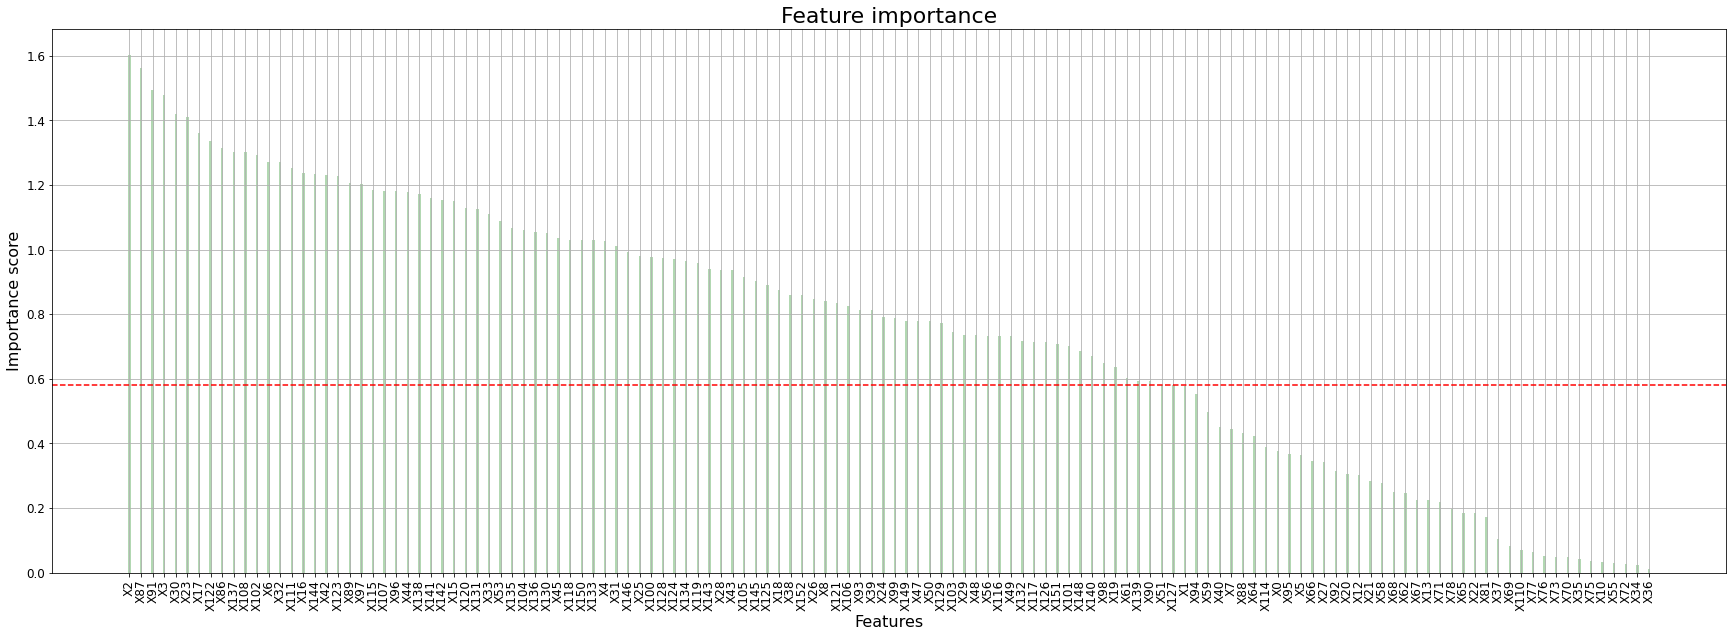

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

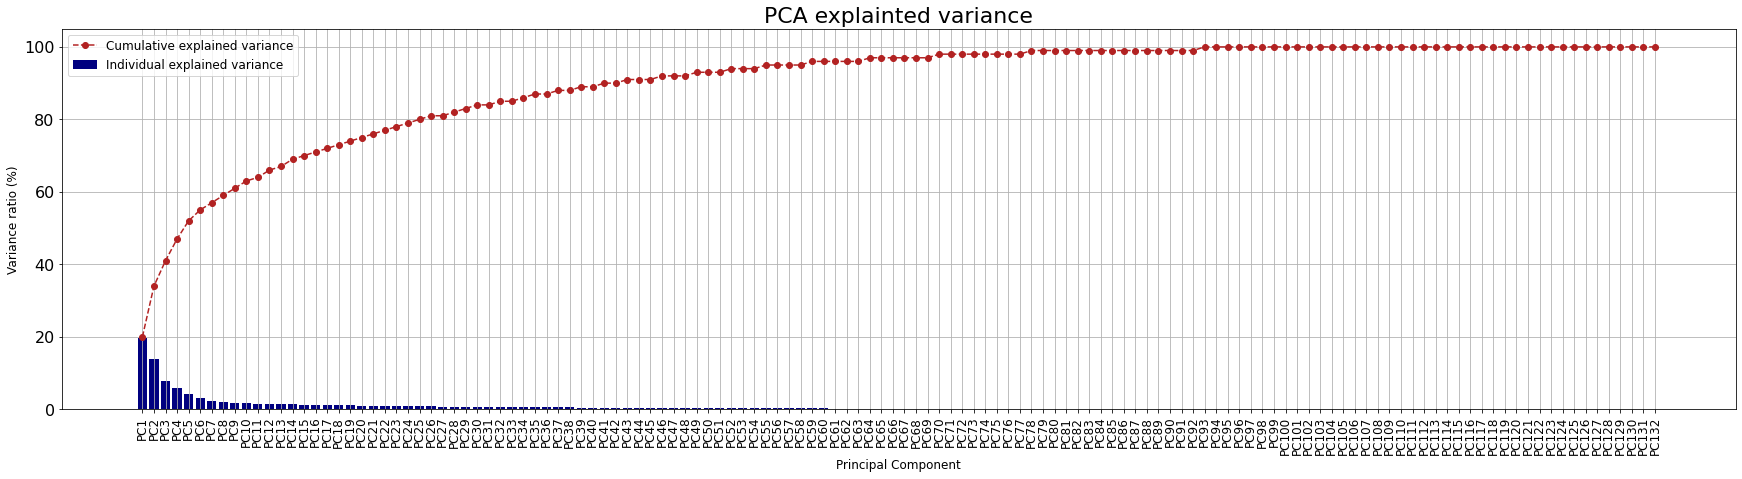

In [22]:
### Print results ###

### Feature importance plot ###
fig=plt.figure(figsize=(30,10))
plt.title("Feature importance", fontsize=22 )
plt.xticks(rotation=90, fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel("Features", fontsize=16)
plt.ylabel("Importance score", fontsize=16)

plt.bar(feature_importance, normalized_scores,  width = 0.2, alpha=0.3, align='center', color='green')
plt.axhline(y=threshold, color='r', linestyle='--', label = 'blabla: {:.2f}'.format(threshold))
plt.grid(True)
plt.show()

### Variance explained plot ###
plt.cla()
plt.clf()
fig = plt.figure()
fig = plt.figure(figsize = (30, 7))
plt.bar(PCs, explained_variance_ratio, color ='navy',
        width = 0.8, label = 'Individual explained variance')
plt.title("PCA explainted variance", fontsize=22)
plt.xticks(rotation=90, fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel("Principal Component", fontsize=12)

plt.ylabel("Variance ratio (%)", fontsize=12)

variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)*100
plt.plot(variance_exp_cumsum, 'o--', color='firebrick', label = 'Cumulative explained variance')
plt.grid()
plt.legend(loc="best", fontsize = 12)
plt.show()

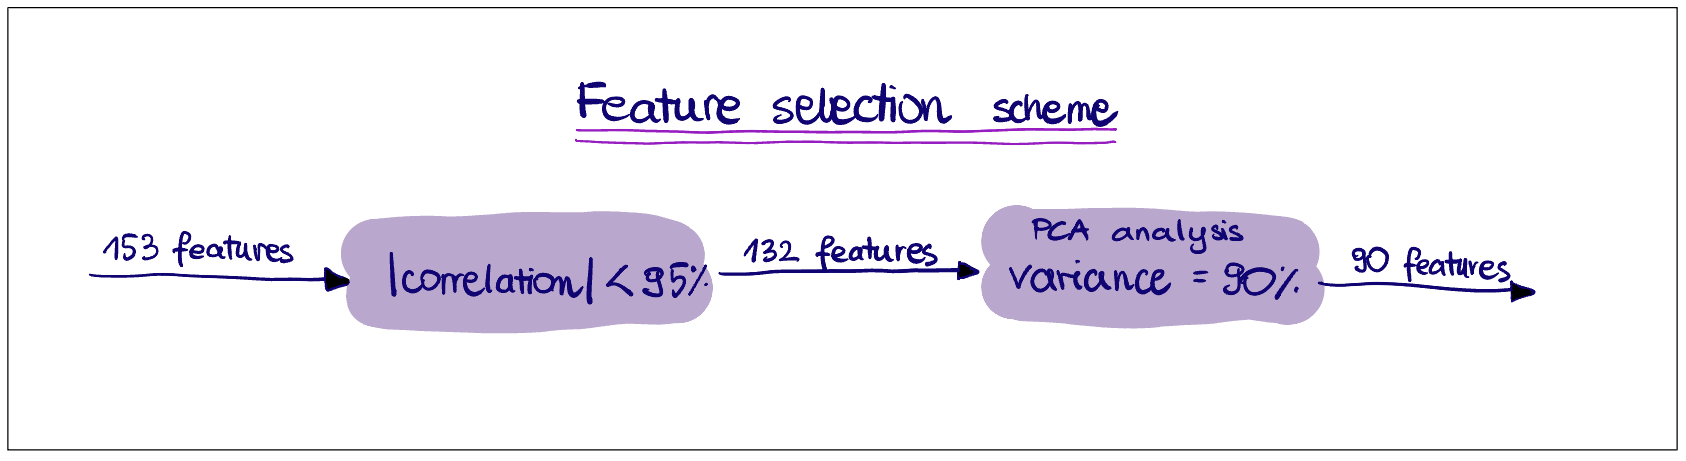

In [23]:
### Feature selection ###
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Hyperparameters tuning, training and evaluating the model

**Models that were considered or tested :**
- GaussianNB - we cannot use this model because our features do not have a Gaussian distribution (only three of them do)
- SVM - confusion matrix was the worst
- MLP - better performance, good confidence
- XGBoost - the best performance, lower confidence 


### Hyperparameter tuning

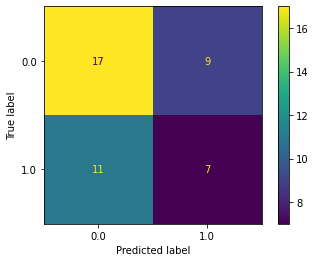

In [24]:
### SVM classifier 
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)
plt.show()


In [25]:
FP = confusion_matrix(y_test, y_pred_svm)[0][1]
FN = confusion_matrix(y_test, y_pred_svm)[1][0]
print("False positives (type I error): {}".format(FP))
print("False negatives (type II error): {}".format(FN))

accuracy = 100 - ((FP + FN)*100/len(y_pred_svm))
print ("Accuracy: {}%".format(round(accuracy, 2)))

False positives (type I error): 9
False negatives (type II error): 11
Accuracy: 54.55%


In [26]:
### MLP Classifier - grid search
mlp_gs = MLPClassifier(max_iter = 380, random_state=1)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(8,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05, 0.00001],
    'learning_rate': ['constant','adaptive'],
}

model_mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
model_mlp

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=380, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 1e-05],
                         'hidden_layer_sizes': [(10, 30, 10), (8,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

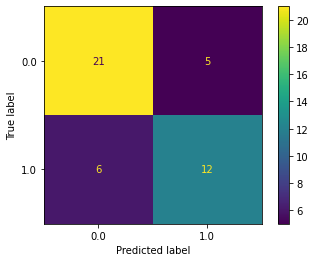

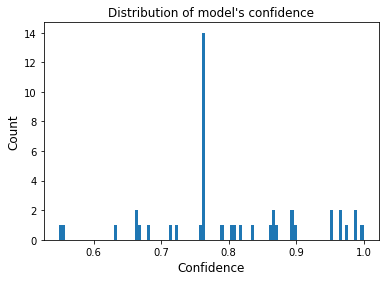

In [27]:
### MLP Classifier - training and evaluation the model
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
y_proba_mlp = model_mlp.predict_proba(X_test)

### Confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay.from_estimator(model_mlp, X_test, y_test)
plt.show()

### Distribution of model's confidence
y_proba_mlp_column = [max(i) for i in y_proba_mlp]
plt.hist(y_proba_mlp_column, bins=100)
plt.title("Distribution of model's confidence", fontsize=12)
plt.xlabel("Confidence", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [28]:
### Evaluation metrics
FP = confusion_matrix(y_test, y_pred_mlp)[0][1]
FN = confusion_matrix(y_test, y_pred_mlp)[1][0]
print("False positives (type I error): {}".format(FP))
print("False negatives (type II error): {}".format(FN))

accuracy = 100 - ((FP + FN)*100/len(y_pred_mlp))
print ("Accuracy: {}%".format(round(accuracy, 2)))

False positives (type I error): 5
False negatives (type II error): 6
Accuracy: 75.0%


In [29]:
### XGBOOST classifier - grid search
model = xgb.XGBClassifier()

parameters = {
    'max_depth': range (2,4,6),
    'n_estimators': range(20, 400, 40),
    'learning_rate': [0.1, 0.01, 0.05, 0.01]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose=True
)


grid_search.fit(X_train, y_train)
model_xgb = grid_search.best_estimator_
model_xgb

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[10:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[10:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


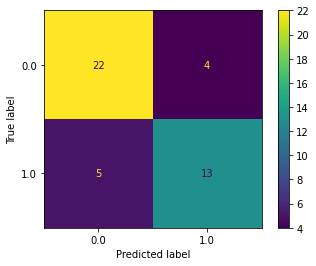

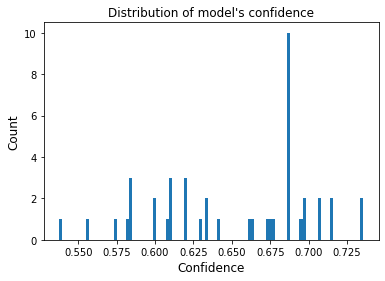

In [30]:
### XGBOOST classifier - training and evaluation the model
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)

### Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test)
plt.show()

### Distribution of model's confidence
y_proba_xgb_col = [max(i) for i in y_proba_xgb]
plt.hist(y_proba_xgb_col, bins=100)
plt.title("Distribution of model's confidence", fontsize=12)
plt.xlabel("Confidence", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [31]:
### Evaluation metrics
FP = confusion_matrix(y_test, y_pred_xgb)[0][1]
FN = confusion_matrix(y_test, y_pred_xgb)[1][0]
print("False positives (type I error): {}".format(FP))
print("False negatives (type II error): {}".format(FN))

accuracy = round(100 - ((FP + FN)*100/len(y_pred_xgb)), 2)
print ("Accuracy: {}%".format(accuracy))

False positives (type I error): 4
False negatives (type II error): 5
Accuracy: 79.55%


In [32]:
### ROC curve plot and AUC metric
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgb)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=500, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [33]:
### Save the model as pickle file
file_name = "model_xgb.pkl"
pickle.dump(model_xgb, open(file_name, "wb"))

### Reload the model
xgb_model_loaded = pickle.load(open(file_name, "rb"))
unlabeled_data = unlabeled_data[selected_features]
xgb_model_loaded.predict_proba(unlabeled_data)[0]

array([0.4299975, 0.5700025], dtype=float32)

### Results for unlabeled data

In [34]:
unlabeled_data = unlabeled_data[selected_features]
y_prediction_column = model_xgb.predict(unlabeled_data).tolist()

y_probability = model_xgb.predict_proba(unlabeled_data).tolist()
y_probability_column = [max(i) for i in y_probability]
unlabeled_data_with_results = unlabeled_data
unlabeled_data_with_results['prediction'] = y_prediction_column
unlabeled_data_with_results['probability'] = y_probability_column
unlabeled_data_with_results = unlabeled_data_with_results.reset_index()
unlabeled_data_with_results.to_csv(pwd + "/unlabeled_data_with_results.csv",index=False)
unlabeled_data_with_results

index  X100  X101  X102  X103  X104  X105  X106  X107  X108  ...  X89  \
0       5     0     0     8     3     2     3     0   607  2458  ...  101   
1      17     0     0     5     0     2     2     1   309  1266  ...   82   
2      23     1     1    11     4     1     6     0   474  1795  ...  100   
3      29     0     2     6     0     1     1     4   385  1580  ...  127   
4      69     2     1    16     4     4     4     4   927  4044  ...  199   
5      87     0     0    13     0     7     2     4   256  1200  ...   68   
6      94     0     1    18     4     6     3     5   295  1169  ...  103   
7     124     0     0     1     1     0     0     0   448  2541  ...   16   
8     145     1     1     6     0     1     1     4   198  1425  ...  113   
9     148     0     0     3     3     0     0     0   133   618  ...   10   
10    158     2     0     6     2     0     2     2   510  2638  ...  130   
11    160     0     1    10     5     0     2     3   556  2650  ...  230   
12    163     0     0    10     3     4     3     0   356  1710  ...  130   
13    164     2     6    20     7     3     3     7   714  3868  ...  130   
14    167     0     0     1     1     0     0     0    59   406  ...    8   
15    170     0     0     1     1     0     0     0   258  1196  ...   20   
16    174     0     0     3     3     0     0     0   113   656  ...  114   
17    177     0     0     1     0     0     1     0   252  1394  ...   75   
18    178     1     0     6     1     1     3     1   245  1554  ...  126   
19    179     3     1     7     0     4     2     1   451  2604  ...  241   
20    182     0     0     9     5     2     2     0   686  8125  ...  169   
21    183     1     0     7     2     3     1     1   260  1597  ...   57   
22    186     0     0     3     1     0     1     1   915  2890  ...   25   
23    192     0    10    35     7     3     3    22   505  2731  ...  220   
24    196     1     0     2     1     0     1     0   249  1286  ...   27   
25    197     0     1    11     4     3     1     3   531  2664  ...   51   
26    202     3    11    27     2     3     6    16   941  4813  ...  525   
27    214     2     0     3     1     0     2     0   399  2349  ...  132   
28    220     0     0     1     0     0     0     1   708  3440  ...   49   
29    225     2     1    31    12     9     6     4  1193  6071  ...  185   
30    231     1     0     4     2     0     1     1   827  3750  ...   47   
31    240     0     1     2     2     0     0     0   406  2212  ...   21   
32    246     2     1    12     2     2     2     6   306  1678  ...   60   
33    251     1     0     3     2     0     1     0   564  2086  ...   20   

    X90     X91  X93  X96  X97  X98  X99  prediction  probability  
0     0  3.0225   13   10    1    0    1         1.0     0.570002  
1     1  1.6468   12    9    1    1    0         0.0     0.583102  
2     0  3.0100   10   13    3    0    1         0.0     0.696631  
3     0  3.4008   28    4    4    1    1         1.0     0.676071  
4     0  2.7846   37   11    9    4    2         1.0     0.694533  
5     0  2.9252   14   18    3    1    2         0.0     0.663970  
6     0  2.7446   19   12    3    2    0         1.0     0.621951  
7     0  2.5413    0    0    0    0    0         0.0     0.642364  
8     0  2.7847    5    6    5    2    1         0.0     0.619115  
9     0  2.0205    0    0    0    0    0         0.0     0.583102  
10    0  4.7748   12   15    6    3    1         0.0     0.696631  
11    0  2.3823   13   14    3    1    1         0.0     0.696631  
12    1  2.5289    6    8    0    0    0         0.0     0.609303  
13    0  3.7124   34   12   13    2    3         1.0     0.703826  
14    0  2.0006    0    0    0    0    0         0.0     0.632795  
15    0  2.0003    0    0    0    0    0         0.0     0.609303  
16    0  1.9298    1    0    0    0    0         0.0     0.687809  
17    0  1.9274    4    0    1    1    0         0.0     0.583102  
18    0  2.6707 

### SHAP explainability

The SHAP explanatory module can help us better understand the results of our model. We can check individual observations with the highest or lowest confidence, and analyze which features and how they influenced the model's decisions. 


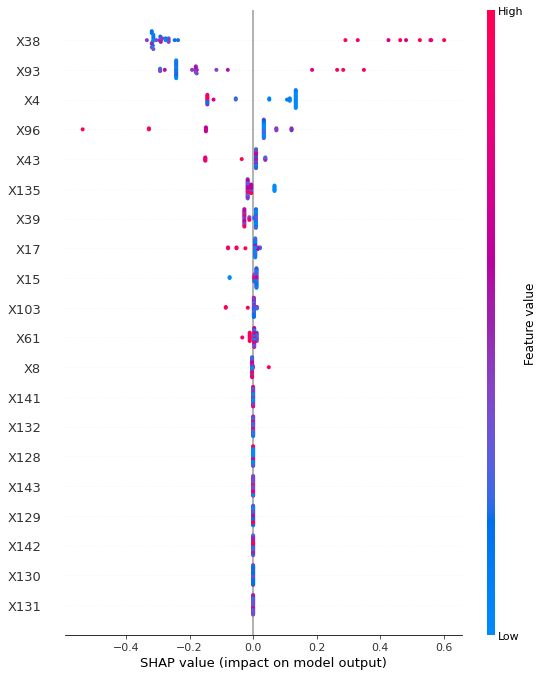

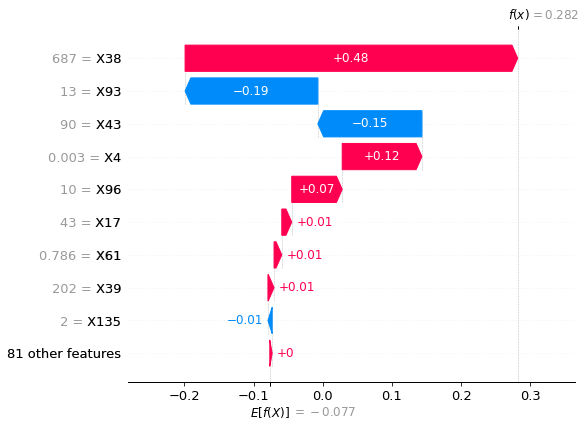

X100  X101  X102  X103  X104  X105  X106  X107  X108  X111  ...  X86  X87  \
5     0     0     8     3     2     3     0   607  2458   904  ...   23  250   

   X89  X90     X91  X93  X96  X97  X98  X99  
5  101    0  3.0225   13   10    1    0    1  

[1 rows x 90 columns]

In [35]:
### SHAP Explainability ###
unlabeled_data = unlabeled_data[selected_features]
shap.initjs()
explainer = shap.Explainer(model_xgb)
shap_values = explainer(unlabeled_data)

# Summary plot
shap.summary_plot(shap_values, unlabeled_data)

# Single plot
shap.plots.waterfall(shap_values[0])
display(unlabeled_data.iloc[[0]])

### Check saved data to dashboard 

In [36]:
data_head_30 = pd.read_csv(pwd + "/data_head_30.csv", sep=",")
data_head_30

index   X0   X1   X2        X3        X4        X5        X6  X7  X8  ...  \
0       0   65   22  216  0.749175  0.000000  0.625455  0.092437   2  10  ...   
1       1   49   19  399  0.533191  0.044968  0.530667  0.045455   2  30  ...   
2       2   59   34  154  0.785425  0.044534  0.669903  0.180851   0  14  ...   
3       3   56   73   19  1.000000  0.000000  0.437500  0.793478   0   1  ...   
4       4   69   48  172  0.844291  0.010381  0.509579  0.218182   1  14  ...   
5       5   70   32  263  0.736986  0.002740  0.536657  0.108475   1  24  ...   
6       6   88   68   59  0.990698  0.000000  0.468293  0.535433   1  16  ...   
7       7  108   30  140  0.971223  0.000000  0.532609  0.176471   0  18  ...   
8       8  129  109   91  0.981763  0.000000  0.477273  0.545000   0  15  ...   
9       9  151   25  154  0.987879  0.000000  0.513846  0.139665   0  13  ...   
10     10   75   62   62  0.959799  0.000000  0.453125  0.500000   0  12  ...   
11     11   56   18  264  0.609467  0.088757  0.492958  0.063830   0  29  ...   
12     12   55   28  284  0.741144  0.038147  0.493827  0.089744   1  37  ...   
13     13   98  121   51  1.000000  0.000000  0.432653  0.703488   1   4  ...   
14     14   79   63   61  0.896552  0.014778  0.488889  0.508065   0   2  ...   
15     15   35   12   17  0.984375  0.000000  0.587302  0.413793   0   3  ...   
16     16  130   58  363  0.887477  0.000000  0.519924  0.137767   0  17  ...   
17     17   89   71   65  0.968889  0.004444  0.473684  0.522059   0   1  ...   
18     18   40   14  147  0.771144  0.004975  0.476190  0.086957   0   9  ...   
19     19   13    7  566  0.257679  0.054608  0.578049  0.012216   0  55  ...   
20     20  118   45  395  0.698925  0.005376  0.522505  0.102273   0  24  ...   
21     21   59   56   52  0.886228  0.065868  0.462069  0.518519   0   8  ...   
22     22  103   23  636  0.653543  0.002625  0.548798  0.034901   2  43  ...   
23     23   75   39  306  0.704762  0.085714  0.580838  0.113043   0  18  ...   
24     24   78   43  148  0.814126  0.014870  0.600000  0.225131   1  23  ...   
25     25   97   31  280  0.794118  0.061275  0.511236  0.099678   0  19  ...   
26     26  104   28  351  0.788820  0.004141  0.521930  0.073879   1  19  ...   
27     27   72   34  298  0.702970  0.101485  0.520710  0.102410   3  28  ...   
28     28   12   13  375  0.337500  0.100000  0.568841  0.033505   1  38  ...   
29     29   75   28  226  0.729483  0.012158  0.685811  0.110236   0  24  ...   

    X144  X145  X146  X147  X148  X149  X150  X151  X152  Class  
0      4     4     9     4     4     2     2     3     2    1.0  
1      8     2     7     8     2     3     4     1     4    1.0  
2      3     4     3     3     9     4     2     2     4    0.0  
3      2     2     2     2     2     2     1     1     1    1.0  
4      2     3     3     3     2     2     2     2     6    1.0  
5      2     3     6     4     5     2     2     1     2    NaN  
6      2     1     2     2     2     2     1     3     2    1.0  
7      2     2     3     3     3     2     1     1     2    1.0  
8      2     1     2     2     4     1     1     2     1    1.0  
9      2     2     2     3     2     2     2     2     2    0.0  
10     2     2     2     2     6     2     1     1     2    0.0  
11     4     3     5     5     6     5     3     3     5    0.0  
12     3     4     4     6     3     3     2     4     3    0.0  
13     2     2     3     2     3     2     1     1     2    1.0  
14     2     2     2     2     2     2     1     2     2    1.0  
15     1     3     3     3     2     2     2     2     2    0.0  
16     3     3     3     4     3     2     1     1     3    1.0  
17     2     2     2     2     2     1     1     1     1    NaN  
18     3     4     3     3     4     2     2     2     2    1.0  
19     5     5     3     6     6     5     3     5     5    1.0  
20     3     3     4     4     3     2     3     2     2    1.0  
21     2     2     2     2     3     1  

In [37]:
data_description = pd.read_csv(pwd + "/data_description.csv", sep=",")
data_description.rename( columns={'Unnamed: 0':''}, inplace=True)
data_description

X0          X1          X2          X3          X4  \
0  count  219.000000  219.000000  219.000000  219.000000  219.000000   
1   mean   81.474886   41.461187  230.538813    0.775216    0.027804   
2    std   42.017177   30.077455  144.479807    0.173546    0.035483   
3    min    5.000000    2.000000   17.000000    0.257679    0.000000   
4    25%   52.000000   18.000000  111.500000    0.685100    0.000000   
5    50%   74.000000   32.000000  231.000000    0.792531    0.012195   
6    75%  106.500000   59.500000  324.500000    0.919608    0.043511   
7    max  245.000000  148.000000  950.000000    1.000000    0.165842   

           X5          X6          X7          X8  ...        X144  \
0  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
1    0.539884    0.208242    0.515982   14.863014  ...    2.931507   
2    0.076318    0.190788    0.890042   11.854216  ...    1.292130   
3    0.410714    0.006689    0.000000    0.000000  ...    1.000000   
4    0.490948    0.065792    0.000000    7.000000  ...    2.000000   
5    0.523438    0.120582    0.000000   13.000000  ...    3.000000   
6    0.567925    0.333345    1.000000   19.500000  ...    4.000000   
7    0.898067    0.793478    7.000000   97.000000  ...    8.000000   

         X145        X146        X147        X148        X149        X150  \
0  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
1    2.885845    3.538813    3.940639    4.401826    2.283105    2.118721   
2    1.215621    1.509025    1.700281    2.253071    0.879031    1.033639   
3    1.000000    1.000000    2.000000    1.000000    1.000000    0.000000   
4    2.000000    2.000000    3.000000    3.000000    2.000000    1.000000   
5    3.000000    3.000000    4.000000    4.000000    2.000000    2.000000   
6    4.000000    4.000000    5.000000    6.000000    3.000000    3.000000   
7   11.000000    9.000000   10.000000   16.000000    6.000000    8.000000   

         X151        X152       Class  
0  219.000000  219.000000  219.000000  
1    2.228311    2.360731    0.456621  
2    1.122302    0.954233    0.499256  
3    1.000000    1.000000    0.000000  
4    1.000000    2.000000    0.000000  
5    2.000000    2.000000    0.000000  
6    3.000000    3.000000    1.000000  
7    6.000000    6.000000    1.000000  

[8 rows x 155 columns]

In [38]:
unlabeled_data_with_results = pd.read_csv(pwd + "/unlabeled_data_with_results.csv", sep=",")
unlabeled_data_with_results

index  X100  X101  X102  X103  X104  X105  X106  X107  X108  ...  X89  \
0       5     0     0     8     3     2     3     0   607  2458  ...  101   
1      17     0     0     5     0     2     2     1   309  1266  ...   82   
2      23     1     1    11     4     1     6     0   474  1795  ...  100   
3      29     0     2     6     0     1     1     4   385  1580  ...  127   
4      69     2     1    16     4     4     4     4   927  4044  ...  199   
5      87     0     0    13     0     7     2     4   256  1200  ...   68   
6      94     0     1    18     4     6     3     5   295  1169  ...  103   
7     124     0     0     1     1     0     0     0   448  2541  ...   16   
8     145     1     1     6     0     1     1     4   198  1425  ...  113   
9     148     0     0     3     3     0     0     0   133   618  ...   10   
10    158     2     0     6     2     0     2     2   510  2638  ...  130   
11    160     0     1    10     5     0     2     3   556  2650  ...  230   
12    163     0     0    10     3     4     3     0   356  1710  ...  130   
13    164     2     6    20     7     3     3     7   714  3868  ...  130   
14    167     0     0     1     1     0     0     0    59   406  ...    8   
15    170     0     0     1     1     0     0     0   258  1196  ...   20   
16    174     0     0     3     3     0     0     0   113   656  ...  114   
17    177     0     0     1     0     0     1     0   252  1394  ...   75   
18    178     1     0     6     1     1     3     1   245  1554  ...  126   
19    179     3     1     7     0     4     2     1   451  2604  ...  241   
20    182     0     0     9     5     2     2     0   686  8125  ...  169   
21    183     1     0     7     2     3     1     1   260  1597  ...   57   
22    186     0     0     3     1     0     1     1   915  2890  ...   25   
23    192     0    10    35     7     3     3    22   505  2731  ...  220   
24    196     1     0     2     1     0     1     0   249  1286  ...   27   
25    197     0     1    11     4     3     1     3   531  2664  ...   51   
26    202     3    11    27     2     3     6    16   941  4813  ...  525   
27    214     2     0     3     1     0     2     0   399  2349  ...  132   
28    220     0     0     1     0     0     0     1   708  3440  ...   49   
29    225     2     1    31    12     9     6     4  1193  6071  ...  185   
30    231     1     0     4     2     0     1     1   827  3750  ...   47   
31    240     0     1     2     2     0     0     0   406  2212  ...   21   
32    246     2     1    12     2     2     2     6   306  1678  ...   60   
33    251     1     0     3     2     0     1     0   564  2086  ...   20   

    X90     X91  X93  X96  X97  X98  X99  prediction  probability  
0     0  3.0225   13   10    1    0    1         1.0     0.570002  
1     1  1.6468   12    9    1    1    0         0.0     0.583102  
2     0  3.0100   10   13    3    0    1         0.0     0.696631  
3     0  3.4008   28    4    4    1    1         1.0     0.676071  
4     0  2.7846   37   11    9    4    2         1.0     0.694533  
5     0  2.9252   14   18    3    1    2         0.0     0.663970  
6     0  2.7446   19   12    3    2    0         1.0     0.621951  
7     0  2.5413    0    0    0    0    0         0.0     0.642364  
8     0  2.7847    5    6    5    2    1         0.0     0.619115  
9     0  2.0205    0    0    0    0    0         0.0     0.583102  
10    0  4.7748   12   15    6    3    1         0.0     0.696631  
11    0  2.3823   13   14    3    1    1         0.0     0.696631  
12    1  2.5289    6    8    0    0    0         0.0     0.609303  
13    0  3.7124   34   12   13    2    3         1.0     0.703826  
14    0  2.0006    0    0    0    0    0         0.0     0.632795  
15    0  2.0003    0    0    0    0    0         0.0     0.609303  
16    0  1.9298    1    0    0    0    0         0.0     0.687809  
17    0  1.9274    4    0    1    1    0         0.0     0.583102  
18    0  2.6707 

In [39]:
unlabeled_data_with_results.shape[0]

34